In [2]:
import os,h5py,glob,time,shutil,random
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from imageio import imread
from skimage import transform,io
from tensorflow import keras
from tensorflow.keras import optimizers
from tensorflow.keras.applications.vgg16 import VGG16
from sklearn.model_selection import train_test_split, ParameterGrid, GridSearchCV
import tensorflow as tf
# from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input, decode_predictions
from tensorflow.keras.models import load_model
from tensorflow.keras.models import Model
from tensorflow.keras.layers import *
from tensorflow.keras.preprocessing import image
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import backend as K
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.callbacks import ModelCheckpoint, TensorBoard, EarlyStopping
from tensorflow.keras.models import load_model
import warnings 
with warnings.catch_warnings(): 
    warnings.filterwarnings("ignore",category=FutureWarning) 


print ("TensorFlow version: " + tf.__version__)
print ("Keras version: " + keras.__version__)

TensorFlow version: 1.12.0
Keras version: 2.1.6-tf


#     LOAD IMAGES


In [3]:
print ("LOADING IMAGES : START")

samples_path = '/data/CRVI/TEST/MIRALIS/DATA/IMtext_train_test/train/'#os.path.join('../DATA','test_texture')
samples_type = '*.png'


# Parameters ---------------------------------------------------------------------------------
# class_names = ['GOOD', 'DEFECT'] # one classe 
class_names = ['DEFECT'] # one classe 
# Mask ---------------------------------------------------------------------------------

lenx = 56
leny = 56
startx = 84 
starty = 84


#Image generator
def image_generator(batch_size, x_data, y_labels):
    while True:
        batch_input, batch_output = [], []
        for idx in range(len(x_data)):         
            batch_input.append(x_data[idx])
            batch_output.append(y_labels[idx])
            if len(batch_input) >= batch_size:
                yield np.stack(batch_input, axis=0), np.asarray(batch_output)
                batch_input, batch_output = [], []

        # Gestion des batches non complètes
        if len(batch_input) > 0:
            yield np.stack(batch_input, axis=0), np.asarray(batch_output)
            batch_input, batch_output = [], []



x_input, x_mask, masklist = [], [], []
# take images from each classe
for category, ImageDir in enumerate(class_names):
    
    img_paths = glob.glob(os.path.join(samples_path, ImageDir, samples_type))
    
    k = min(100,len(img_paths))
    
    files = random.sample(img_paths, k )
    print('N images ' + class_names[category] + ': ', k)
    
    for idx, f in enumerate(files):
        try:
            im = np.asarray(imread(f))[:,:,:3].astype('float32') / 255. 
#             plt.imshow(im)
            #print('imagen shape', im.shape)            
        except ValueError:
            print("Could not read", f)
            continue
        im = 2*(im - 0.5)
        # array of images
        x_input.append(transform.resize(im, (224, 224), mode = 'reflect'))
        # create mask 
        imask = np.ones(im.shape)
        
        
        imask[startx:startx+lenx, starty:starty+leny] = 0
        masklist.append(imask)
        
        # image masquée
        ima_mask = im * imask     
        
        x_mask.append(ima_mask)
# # Split images in train - validation              
x = np.stack(x_mask)


# num_images_train = len(x_train)
# num_images_val = len(x_val)
# print('num images train: ',num_images_train,'num images val: ', num_images_val)




print ("LOADING IMAGES : DONE")

LOADING IMAGES : START
N images DEFECT:  100
LOADING IMAGES : DONE


# PLOT IMAGES

START


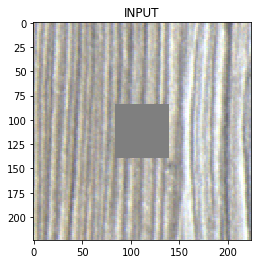

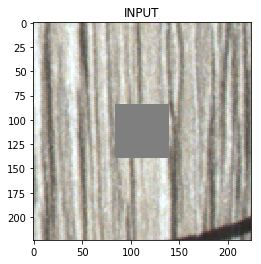

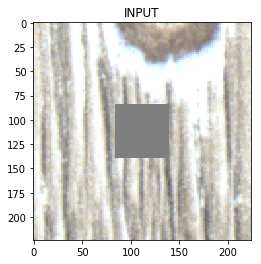

DONE


In [4]:
print ("START")

def do_plot(ax, Z, TI, cmap=None, colors=None):
   
    Z = ((Z/2)+0.5)*255
    
   
    im = ax.imshow((Z).astype(np.uint8),cmap=cmap)
    ax.set_title(TI)

nimages = 3;
   

for i in range(nimages):
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    do_plot(ax,x_mask[i],'INPUT')
    
    plt.show()

print ("DONE")

In [5]:
print ("START")
# Load best model
model_name = 'mask4.h5'
file = h5py.File(model_name, 'r')
print ("File Keras version: " + file.attrs.get('keras_version').decode("utf-8") )
model = load_model(model_name)

# model =  model.load_weights('model-mask3.h5')
# model.load_weights('model-mask3.h5')
print ("DONE")

START
File Keras version: 2.1.6-tf
DONE


In [6]:
print ("START")
# Predict on train, val and test
preds_test = model.predict(x, verbose=1)

# print(preds_val[1])

# Threshold predictions
preds_test_t = (preds_test - x)


print ("DONE")

START
100/100 [==============================] - 2s 24ms/step
DONE


In [7]:
print ("START")
# Evaluate on validation set (this must be equals to the best log_loss)
eval_test = model.evaluate(x, preds_test, verbose=1)


# Evaluate on validation set (this must be equals to the best log_loss)
print(model.metrics_names)

print('Test {} {} {} {}'.format(model.metrics_names[0],eval_test[0],model.metrics_names[1],eval_test[1]))


print ("DONE")

START
100/100 [==============================] - 1s 9ms/step
['loss', 'acc']
Test loss 0.00030265362860518505 acc 0.9999995994567871
DONE


START


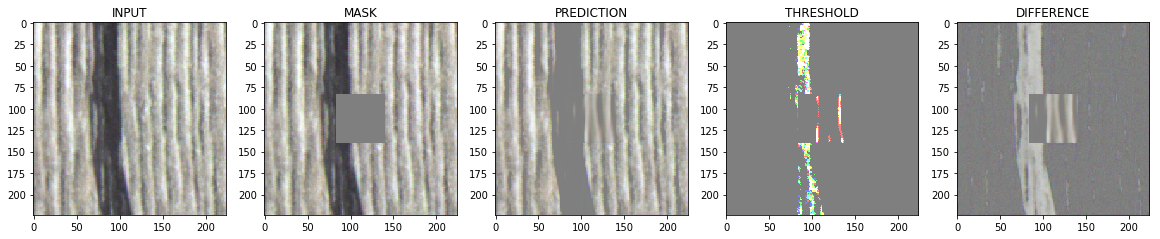

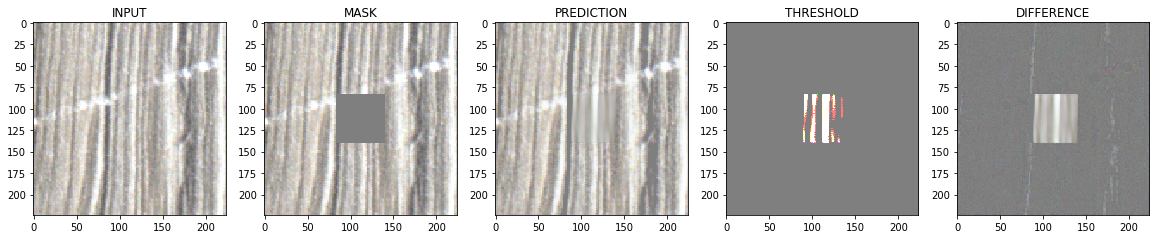

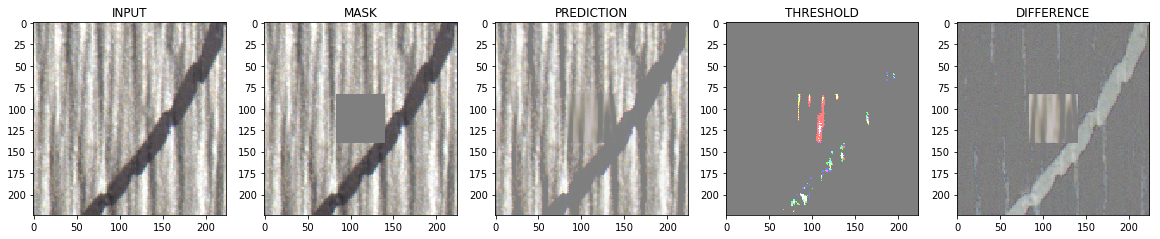

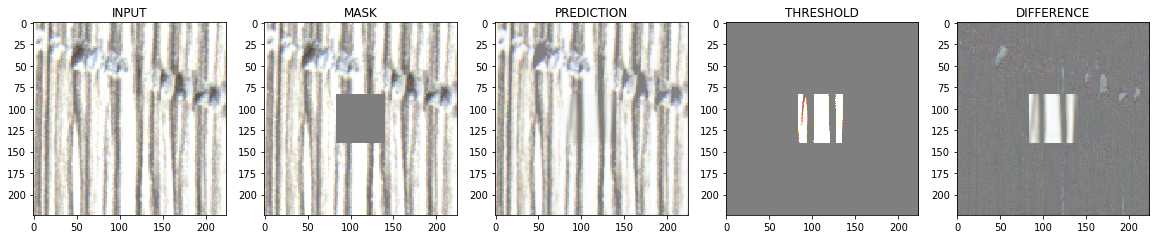

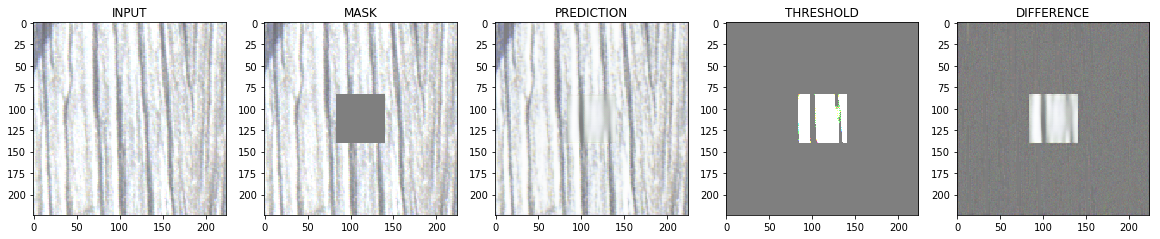

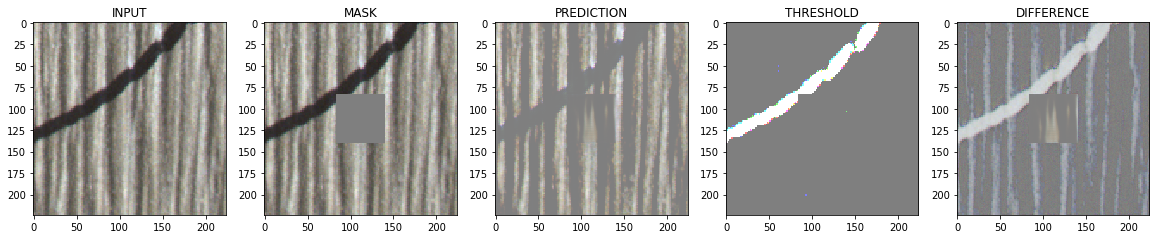

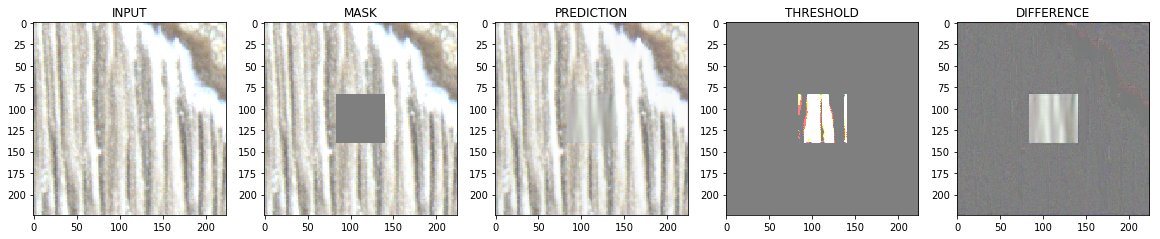

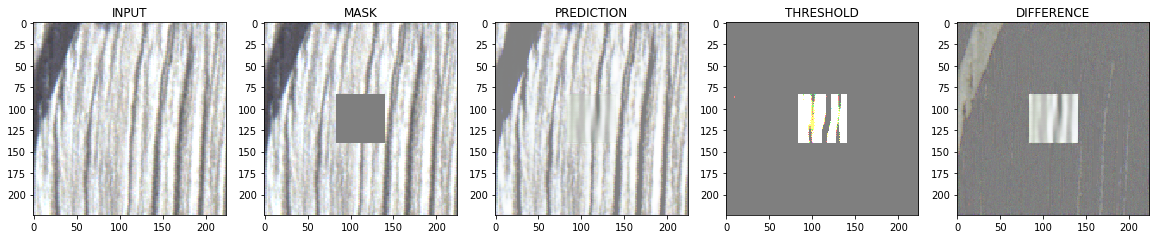

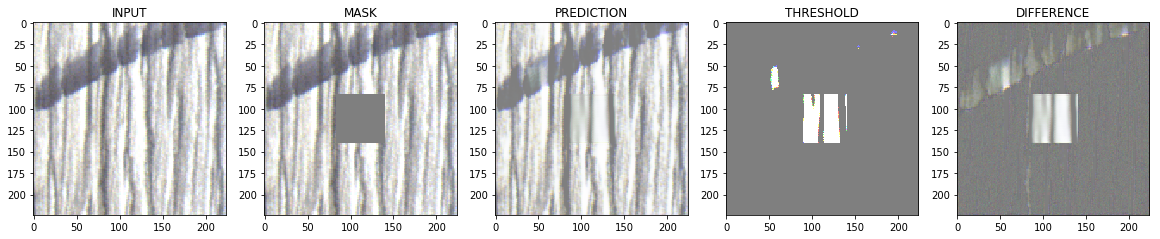

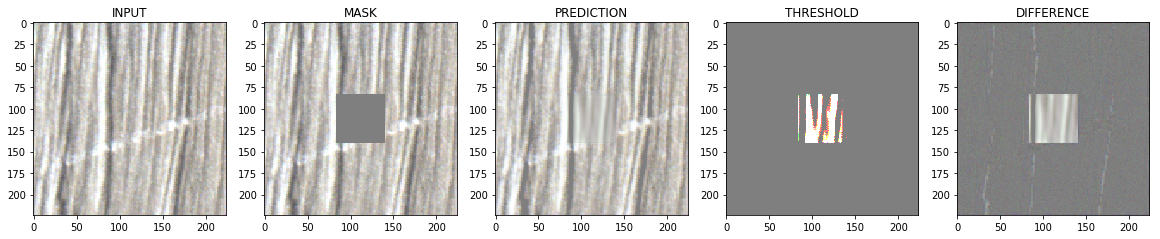

DONE


In [13]:
print ("START")

from matplotlib import cm


for i in range(20,30):
    fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1, 5,figsize=(20, 10))
    do_plot(ax1,x_input[i],'INPUT')
    do_plot(ax2,x[i],'MASK')
    do_plot(ax3,preds_test[i],'PREDICTION')
        
    # Threshold predictions
    preds_threshold = (preds_test_t[i] > 0.5).astype(np.uint8)
    


    do_plot(ax4,preds_threshold,'THRESHOLD')
    do_plot(ax5,preds_test_t[i] ,'DIFFERENCE')
#     plt.savefig('imasque')
    plt.show()
    
    
    
print ("DONE")